# Problem 1


## Problem 1A

The flow rate to the reactor would definitely impact the final conversion of the products. Given that we have a finite sized reactor, two possibilties can occur:
- A large volumetric flow rate could mean that the reactants do not get enough time to react with each other in the presence of catalyst, thereby decreasing conversion. This means that $\tau_{1}$ which is the ratio of volume to volumetric flow rate would be very low i.e. the residence time would be low. This would impact conversion (assuming the same $\tau_{2}$)
- A slow flow rate could only lead to complete conversion and that would represent the final limit of product formed from a given reactor
- An intermediate flow rate could lead to full conversion is the reactant is large enough or would lead to an intermediate conversion



## Problem 1B

- An initial value of Ft_initial(Ft0 as defined here) was set at 5mol/s, given values of Pressure and Temepratures were used
- Based on initial molar ratios at inlet, the individual species molar flow rates are found
- Using ideal gas relation, given by $\nu _{0} = \frac{F_{t, 0}RT}{P_{0}}$
- Find concentrations from these values

In [1]:
#Problem 1B

#Using an arbitrary molar flow rate:

Ft0 = 5 #mol/s
P0 = 6 * 101325 #Pa
R = 8.314 # SI Units
T = 838 #K 

#Calculating the individual species molar flow rates

Fco0 = 0.02*Ft0 #mol/s
Fo20 = 0.1*Ft0 #mol/s
Fi0 = Ft0 - Fco0 - Fo20 #mol/s
Fco20 = 0 #mol/s

nu0 = (Ft0*R*T)/P0  #m3/s

C0co = Fco0/nu0 #mol/m3 
C0o2 = Fo20/nu0 #mol/m3
C0i = Fi0/nu0 #mol/m3
print ('\n The concentration at the inlet: \n Carbon Monoxide: {0:1.5f} mol/m3 \n Oxygen: {1:1.5f} mol/m3 \n Inert: {2:1.5f} mol/m3'.format(C0co, C0o2, C0i))  
print ('\n The flow rate at the inlet: \n Carbon Monoxide: {0:1.5f} mol/m3 \n Oxygen: {1:1.5f} mol/m3 \n Inert: {2:1.5f} mol/m3'.format(Fco0, Fo20, Fi0))  

print ('\n **For any arbitrary value of molar flow rate, we get the same concentrations at inlet for all species**')
print ('\n **For any arbitrary value of molar flow rate, we get the different values of molar flow rates at inlet for all species**')




 The concentration at the inlet: 
 Carbon Monoxide: 1.74519 mol/m3 
 Oxygen: 8.72597 mol/m3 
 Inert: 76.78856 mol/m3

 The flow rate at the inlet: 
 Carbon Monoxide: 0.10000 mol/m3 
 Oxygen: 0.50000 mol/m3 
 Inert: 4.40000 mol/m3

 **For any arbitrary value of molar flow rate, we get the same concentrations at inlet for all species**

 **For any arbitrary value of molar flow rate, we get the different values of molar flow rates at inlet for all species**




## Problem 1C

- The first part of the code details using the given values to find the inital flow rates and concentrations, just like in the previous question
- To setup the ode, Flow rates are unpacked and then added to find the total molar flow rates for all species
- $P = yP_{0}$ is used to find the pressure at any point in the reactor
- Individual species concentrations are found
- The kinetics is input following the rate law provided
- The differential equations are used based on stoichiometry, the pressure drop is incorporated by using the last diff. equation
- Flow rates and pressure drop are plotted


 The concentration at the inlet: 
 Carbon Monoxide: 1.74519 mol/m3 
 Oxygen: 8.72597 mol/m3 
 Inert: 76.78856 mol/m3


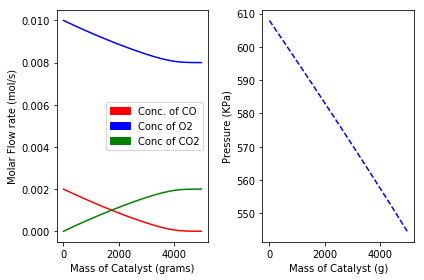

In [2]:
#Problem 1C
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

#Finding the molar inlet concentrations for the given molar flow rate

Ft0 = 0.1 #mol/s
P0 = 101325 #Pa
R = 8.314 # SI Units
T = 838 #K 
P0 = 607950 #Pascals

#Calculating the individual species molar flow rates

Fco0 = 0.02*Ft0 #mol/s
Fo20 = 0.1*Ft0  #mol/s
Fi0 = Ft0 - Fco0 - Fo20  #mol/s
Fco20 = 0  #mol/s

nu0 = (Ft0*R*T)/P0  #m3/s

C0co = Fco0/nu0 #mol/m3
C0o2 = Fo20/nu0 #mol/m3
C0i = Fi0/nu0 #mol/m3
print ('\n The concentration at the inlet: \n Carbon Monoxide: {0:1.5f} mol/m3 \n Oxygen: {1:1.5f} mol/m3 \n Inert: {2:1.5f} mol/m3'.format(C0co, C0o2, C0i))  

#Some reactor constants
k = 9.73 * np.exp(-13500/T) #m3/mol.s.g
K = 8.099 * np.exp(409/T) #m3/mol
alpha = 0.00004 #1/g

#Defining ODE that would solve for concentrations

Wspan = np.linspace(0, 5000, 1000)

#Needed to find concentrations, not needed in this question
Cco_val = np.zeros(len(Wspan))
Co2_val = np.zeros(len(Wspan))
Cco2_val = np.zeros(len(Wspan))
i = 0

#Defining the ODE

def ode (F, W):
    Fco, Fo2, Fco2, y = F #unpack, no Fi because it plays no role in reaction
    P = y * P0
    Ft = Fco + Fco2 + Fo2 + Fi0 #Total molar flow rate at any given time
    nu = nu0 * (Ft/Ft0) * (P0/P)  #Calculating volumetric flow rate at a given time
    Cco = Fco/nu
    Co2 = Fo2/nu
    Cco2 = Fco2/nu
    Ci = Fi0/nu 
    global i
    
    Cco_val[i] = float(Cco)
    Co2_val[i] = float(Co2)
    Cco2_val[i] = float(Cco2)
    
    i = i +1
    #Kinetics:
    r = (k*Cco*Co2)/(1 + K*Cco)
    
    #Reactions
    
    dFcodW = -r
    dFo2dW = -r
    dFco2dW = r
    dydW = (-alpha/(2*y)) * (Ft/Ft0)
    
    return [dFcodW, dFo2dW, dFco2dW, dydW]

#Initial conditions of parameters

y0 = 1
F0 = [Fco0, Fo20, Fco20, y0]


sol = odeint(ode, F0, Wspan)


plt.subplot (1, 2, 1)


plt.plot(Wspan, sol[:, 0], '-r')
plt.plot(Wspan, sol[:, 1], '-b')
plt.plot(Wspan, sol[:, 2], '-g')
red_patch = mpatches.Patch(color = 'red', label = 'Conc. of CO')
blue_patch = mpatches.Patch(color = 'blue', label = 'Conc of O2')
green_patch = mpatches.Patch(color = 'green', label = 'Conc of CO2')
plt.xlabel('Mass of Catalyst (grams)')
plt.ylabel('Molar Flow rate (mol/s)')
plt.legend(handles = [red_patch, blue_patch, green_patch])

plt.subplot(1, 2, 2)

plt.plot(Wspan, (sol[:,3]*P0)/1000, '--b')
plt.xlabel('Mass of Catalyst (g)')
plt.ylabel('Pressure (KPa)')

plt.tight_layout()
plt.show()

#print (sol[-1, 0], sol[-1, 1], sol[-1, 2])

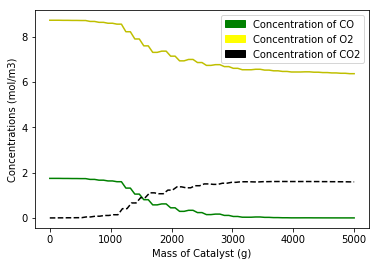

In [3]:
#Bonus
# IF we take the values of C from the integration, we get the following. Plotting:
plt.plot(np.linspace(0,5000,69), np.trim_zeros(Cco_val), '-g')
plt.plot(np.linspace(0,5000,69), np.trim_zeros(Co2_val), '-y')
plt.plot(np.linspace(0,5000,68), np.trim_zeros(Cco2_val), '--k')
plt.xlabel('Mass of Catalyst (g)')
plt.ylabel('Concentrations (mol/m3)')
green_patch = mpatches.Patch(color = 'green', label = 'Concentration of CO')
yellow_patch = mpatches.Patch(color = 'yellow', label = 'Concentration of O2')
black_patch = mpatches.Patch(color = 'black', label = 'Concentration of CO2')
plt.legend(handles = [green_patch, yellow_patch, black_patch])
plt.show()




## Problem 1D

- Shooting method to find the solution can be used here, as we have one initial and final boundary condition. We would need to find the initial boundary condition
- fsolve is used to implement this. The final value of pressure is taken and compared to 101.325KPa, based on this change, the initial guess is altered.
- The pressure curve is plotted

The value of initial pressure that would make the final pressure 101.325KPa (or 1atm) is [ 113.19370229]KPa


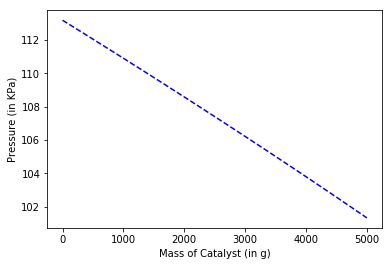

In [4]:
#Problem 1D

from scipy.optimize import fsolve

#Defining ODE just like before

def ode (F, W):
    Fco, Fo2, Fco2, y = F #unpack, no Fi because it plays no role in reaction
    P = y * P0
    Ft = Fco + Fco2 + Fo2 + Fi0 #Total molar flow rate at any given time
    nu = nu0 * (Ft/Ft0) * (P0/P)  #Claculating volumetric flow rate at a given time
    Cco = Fco/nu
    Co2 = Fo2/nu
    Cco2 = Fco2/nu
    Ci = Fi0/nu 
    

    #Kinetics:
    r = (k*Cco*Co2)/(1 + K*Cco)
    
    #Reactions
    
    dFcodW = -r
    dFo2dW = -r/2
    dFco2dW = r
    dydW = (-alpha/(2*y)) * (Ft/Ft0)
    
    return [dFcodW, dFo2dW, dFco2dW, dydW]

F0 = [Fco0, Fo20, Fco20, y0]


#Defining an objective function to find the 
def objective (P0):
    Wspan = np.linspace(0, 5000, 1000)
    sol = odeint(ode, F0, Wspan)
    P = sol[-1, 3]*P0 - 101325
    return P

P0 = fsolve (objective, 101325)

Wspan = np.linspace(0, 5000)
sol = odeint(ode, F0, Wspan)

print('The value of initial pressure that would make the final pressure 101.325KPa (or 1atm) is {}KPa'.format(P0/1000))
plt.plot(Wspan, (sol[:,3]*P0)/1000, '--b')
plt.xlabel('Mass of Catalyst (in g)')
plt.ylabel('Pressure (in KPa)')
plt.show()





## Problem 1E

- An increase in W from 5kg to 50kg shows abnormal behaviour after solving the inegration for ~20kg, with all values dropping to zero
- This is possibily becuase the differential equations are stiff and causing the step size for integration to be smaller that it is supposed to be for a large size. This is causing abnormal behaviour

/opt/conda/lib/python3.6/site-packages/scipy/integrate/odepack.py:218: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


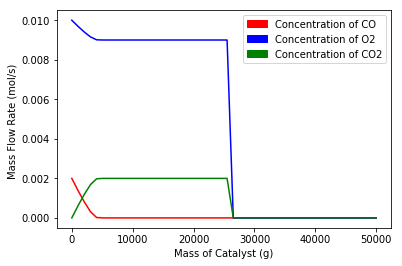

In [5]:
k = 9.73 * np.exp(-13500/T) #m3/mol.s.g
K = 8.099 * np.exp(409/T) #m3/mol

def ode (F, W):
    Fco, Fo2, Fco2, y = F #unpack, no Fi because it plays no role in reaction
    P = y * P0
    Ft = Fco + Fco2 + Fo2 + Fi0 #Total molar flow rate at any given time
    nu = nu0 * (Ft/Ft0) * (P0/P)  #Claculating volumetric flow rate at a given time
    Cco = Fco/nu
    Co2 = Fo2/nu
    Cco2 = Fco2/nu
    Ci = Fi0/nu 
    
    #Kinetics:
    r = (k*Cco*Co2)/(1 + K*Cco)
    
    #Reactions
    
    dFcodW = -r
    dFo2dW = -r/2
    dFco2dW = r
    dydW = (-alpha/(2*y)) * (Ft/Ft0)
    
    return [dFcodW, dFo2dW, dFco2dW, dydW]


Wspan = np.linspace(0, 50000) #Using 50kg as the stop point instead
sol = odeint(ode, F0, Wspan)

plt.plot(Wspan, sol[:, 0], '-r')
plt.plot(Wspan, sol[:, 1], '-b')
plt.plot(Wspan, sol[:, 2], '-g')
red_patch = mpatches.Patch(color = 'red', label = 'Concentration of CO')
blue_patch = mpatches.Patch(color = 'blue', label = 'Concentration of O2')
green_patch = mpatches.Patch(color = 'green', label = 'Concentration of CO2')
plt.legend(handles = [red_patch, blue_patch, green_patch])
plt.xlabel('Mass of Catalyst (g)')
plt.ylabel('Mass Flow Rate (mol/s) ')

plt.show()


# Problem 2


## Problem 2A

- To solve this transient cstr start-up problem, a conc function was setup to integrate for concnetrations of species in the first 30 seconds using odeint
- The kinetics of the reaction were written according to the units provided for k, which showed that all reactions were elementary 
- dCdt terms were written according to the stoichiometry of the reactions
- X and Y show some absurd behaviour and then proceed to decrease/increase

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:44: RuntimeWarning: divide by zero encountered in log
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:45: RuntimeWarning: divide by zero encountered in log


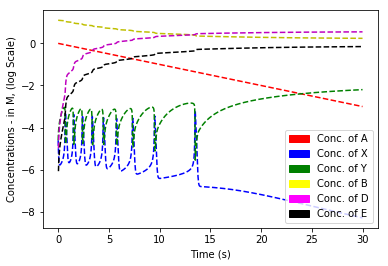

In [6]:
#Problem 2A
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from scipy.integrate import odeint
from scipy.optimize import fsolve
#constants
k1 = 0.1 #1/s
k2 = 10**5 #1/M2S
k3 = 10 #1/Ms
k4 = 10 #1/s

def conc (C, t):
    Ca, Cx, Cy, Cb, Cd, Ce = C
    
    #Kinetics of Reaction
    
    r1 = k1*Ca
    r2 = k2*(Cx**2)*Cy
    r3 = k3*Cb*Cx
    r4 = k4*Cx
    
    #Stiochiometry of Reaction
    
    dCadt = -r1
    dCxdt = r1 -2*r2 + 3*r2 - r3 -r4
    dCydt = -r2 +r3
    dCbdt = -r3
    dCddt = r3
    dCedt = r4
    
    return [dCadt, dCxdt, dCydt, dCbdt, dCddt, dCedt]

tspan = np.linspace(0,30,1000)
C0 = [1, 0.01, 0.01, 3, 0, 0]

sol2 = odeint(conc, C0, tspan)


plt.plot(tspan, np.log(sol2[:, 0]), '--r')
plt.plot(tspan, np.log(sol2[:, 1]), '--b')
plt.plot(tspan, np.log(sol2[:, 2]), '--g')
plt.plot(tspan, np.log(sol2[:, 3]), '--y')
plt.plot(tspan, np.log(sol2[:, 4]), '--m')
plt.plot(tspan, np.log(sol2[:, 5]), '--k')
plt.xlabel('Time (s)')
plt.ylabel('Concentrations - in M, (log Scale)')
red_patch = mpatches.Patch(color = 'red', label = 'Conc. of A')
blue_patch = mpatches.Patch(color = 'blue', label = 'Conc. of X')
green_patch = mpatches.Patch(color = 'green', label = 'Conc. of Y')
yellow_patch = mpatches.Patch(color = 'yellow', label = 'Conc. of B')
magenta_patch = mpatches.Patch(color = 'magenta', label = 'Conc. of D')
black_patch = mpatches.Patch(color = 'black', label = 'Conc. of E')
plt.legend(handles = [red_patch, blue_patch, green_patch, yellow_patch, magenta_patch, black_patch])
plt.show()


## Problem 2B

- Here, the assumption taken is that the initial charge of A, B, X, Y, D and E remain the same as the previous problem, the only change being the inlet/outlet flow rate of A and B. It is also assumed that the volume of the reactor must remain the same. Hence *Volumetric flow rate will remain the same at inlet and outlet*.

- The same conc function to integrate was used, except for the addition of the flow terms - $F_{A,0}/V$ and $F_{B,0}/V$ for intlet and $F_{A}/V$ and $F_{B}/V$ for the outlet
- The corresponding graphs appear to smooth and no absurd values are found

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:52: RuntimeWarning: divide by zero encountered in log
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:53: RuntimeWarning: divide by zero encountered in log


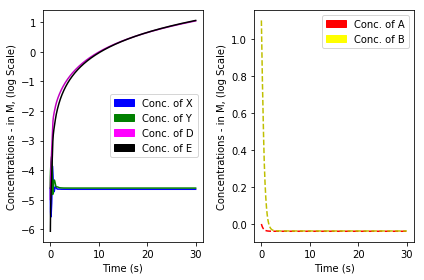

In [7]:
#Problem 2B
import numpy as np
import matplotlib.pyplot as plt
#constants
k1 = 0.1 #1/s
k2 = 10**5 #1/M2S
k3 = 10 #1/Ms
k4 = 10 #1/s
Ca0_in = 1 #M
Cb0_in = 1 #M
nu0 = 0.05 #m3/s
V = 0.02 #m3

def conc2 (C, t):
    Ca, Cx, Cy, Cb, Cd, Ce = C
    
    #Kinetics of Reaction
    
    r1 = k1*Ca
    r2 = k2*(Cx**2)*Cy
    r3 = k3*Cb*Cx
    r4 = k4*Cx
    
    #Inflow- Outflow terms
    
    Fa0 = nu0 * Ca0_in
    Fb0 = nu0 * Cb0_in
    Fa = nu0 * Ca #Assuming volume in the reactor is held constant
    Fb = nu0* Cb
    
    #Stiochiometry of Reaction
    
    dCadt = (Fa0/V) - (Fa/V) - r1 
    dCxdt = r1 -2*r2 + 3*r2 - r3 -r4
    dCydt = (-r2) + r3
    dCbdt = (Fb0/V) - (Fb/V) - r3
    dCddt = r3
    dCedt = r4
    
    return [dCadt, dCxdt, dCydt, dCbdt, dCddt, dCedt]

tspan = np.linspace(0,30,1000)
C0 = [1, 0.01, 0.01, 3, 0, 0]

sol2 = odeint(conc2, C0, tspan)


plt.subplot(1, 2, 1)

plt.plot(tspan, np.log(sol2[:, 1]), '-b')
plt.plot(tspan, np.log(sol2[:, 2]), '-g')
plt.plot(tspan, np.log(sol2[:, 4]), '-m')
plt.plot(tspan, np.log(sol2[:, 5]), '-k')
blue_patch = mpatches.Patch(color = 'blue', label = 'Conc. of X')
green_patch = mpatches.Patch(color = 'green', label = 'Conc. of Y')
magenta_patch = mpatches.Patch(color = 'magenta', label = 'Conc. of D')
black_patch = mpatches.Patch(color = 'black', label = 'Conc. of E')
plt.legend(handles = [blue_patch, green_patch, magenta_patch, black_patch])
plt.xlabel('Time (s)')
plt.ylabel('Concentrations - in M, (log Scale)')

plt.subplot(1, 2, 2)
plt.plot(tspan, np.log(sol2[:, 0]), '--r')
plt.plot(tspan, np.log(sol2[:, 3]), '--y')
red_patch = mpatches.Patch(color = 'red', label = 'Conc. of A')
yellow_patch = mpatches.Patch(color = 'yellow', label = 'Conc. of B')
plt.legend(handles=[red_patch, yellow_patch])
plt.xlabel('Time (s)')
plt.ylabel('Concentrations - in M, (log Scale)')


plt.tight_layout()
plt.show()




## Problem 2C

- In order to be monotinicaly decreasing, the slopes must always be negative. However, that condition would not work on fsolve. Thus, by using the condition that the slopes should be equal at the start and at the end, we enforce some sort of constraint on the integration. This leads to a monotonically decreasing curve

The initial concentration of B that would give a monotonically decreasing curve is: [ 1.00044142] M


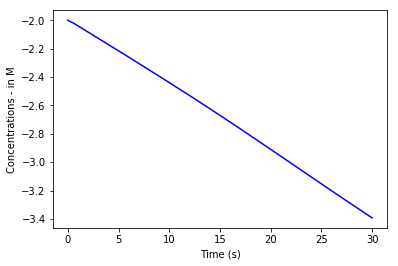

In [8]:
def conc (C, t):
    Ca, Cx, Cy, Cb, Cd, Ce = C
    
    #Kinetics of Reaction
    
    r1 = k1*Ca
    r2 = k2*(Cx**2)*Cy
    r3 = k3*Cb*Cx
    r4 = k4*Cx
    
    #Stiochiometry of Reaction
    
    dCadt = -r1
    dCxdt = r1 -2*r2 + 3*r2 - r3 -r4
    dCydt = -r2 +r3
    dCbdt = -r3
    dCddt = r3
    dCedt = r4
    
    return [dCadt, dCxdt, dCydt, dCbdt, dCddt, dCedt]


def objective (Cb):
    C0 = [1, 0.01, 0.01, Cb, 0, 0]
    tspan = np.linspace(0,30,1000)
    sol3 = odeint(conc, C0, tspan)
    r1_f = k1*sol3[-1,0]
    r2_f = k2*(sol3[-1, 1]**2)*sol3[-1, 2]
    r3_f = k3*sol3[-1, 3]*sol3[-1, 1]
    r4_f = k4*sol3[-1, 1]
    r1_i = k1*C0[0]
    r2_i = k2*(C0[1]**2)*C0[2]
    r3_i = k3*C0[3]*C0[1]
    r4_i = k4*C0[1]
    value = (r1_f -2*r2_f + 3*r2_f - r3_f -r4_f) - (r1_i -2*r2_i + 3*r2_i - r3_i -r4_i) 
    return value

C_val = fsolve(objective, 0.01)
print ('The initial concentration of B that would give a monotonically decreasing curve is: {} M'.format(C_val))

C0 = [1, 0.01, 0.01, C_val, 0, 0]

tspan = np.linspace(0,30)
sol3 = odeint(conc, C0, tspan)

#plt.plot(tspan, sol2[:, 0], '-r')
plt.plot(tspan,np.log10(sol3[:, 1]), '-b')
#plt.plot(tspan, sol2[:, 2], '--g')
#plt.plot(tspan, sol2[:, 3], '-y')
#plt.plot(tspan, sol2[:, 4], '--m')
#plt.plot(tspan, sol2[:, 5], '--k')
plt.xlabel('Time (s)')
plt.ylabel('Concentrations - in M')
plt.show()






## Problem 2D

- The instability caused is probably due to the set of reactions and their respective k values.
- We have three reactions where X is consumed and two reactions where X is produced, with one reaction both consuming and producing X
- The rate constants given are also of different orders of magnitude. The second reaction shows the highest rate constant. Thus, X is getting produced in spurts and getting consumed in spurts. This would mean that the graph would produce such a profile for X

- Looking at the equations, they seem to be highly coupled in nature becuase of the presence of concentration of X terms in al equations. This is possibly one reason for this behaviour.